다중 분류 로지스틱 회귀 이론


1. 다중 분류란 무엇인가요?

이전에 학습했던 이진 분류는 '합격/불합격'이나 '고양이/고양이가 아님'처럼 결과를 두 가지 중 하나로 예측하는 것이었습니다.

하지만 현실에서는 예측해야 할 범주가 세 가지 이상인 경우가 훨씬 많습니다. 예를 들어, 아래와 같은 경우들이 있습니다.

 - 붓꽃의 품종을 '세토사', '버시컬러', '버지니카' 중 하나로 분류하기 (3가지)

 - 손글씨 숫자를 '0', '1', '2', ..., '9' 중 하나로 분류하기 (10가지)

 - 사진 속의 물체를 '자동차', '자전거', '오토바이' 중 하나로 분류하기 (3가지)

이처럼 세 개 이상의 범주로 분류하는 것을 다중 분류라고 합니다.


2. 다중 분류 로지스틱 회귀의 작동 원리

다중 분류 로지스틱 회귀 모델은 이진 분류 모델을 확장한 것으로, 여러 개의 범주를 동시에 분류할 수 있습니다. 

핵심 원리는 다음과 같습니다.


 - 확률 계산: 모델이 입력된 데이터에 대해 각 범주에 속할 확률을 계산합니다. 
             
             예를 들어, 손글씨 '5' 이미지를 보면 '0일 확률 1%', '1일 확률 2%', '5일 확률 85%', '9일 확률 10%' 등으로 계산합니다.

 - 소프트맥스 함수: 이때 여러 범주의 확률을 한꺼번에 계산하고, 그 합이 1이 되도록 만들어주는 특별한 함수를 소프트맥스 함수라고 합니다.

 - 최종 예측: 계산된 확률 중 가장 높은 확률을 가진 범주를 최종 예측 결과로 선택합니다. 
 
             위 예시에서는 '5일 확률 85%'가 가장 높으므로, 이 데이터를 '5'라고 예측하게 됩니다.


간단히 말해, 

모델이 **"이 데이터는 여러 범주 중에서 어떤 범주에 속할 가능성이 가장 높을까?"**를 

확률로 판단하여 답을 내는 과정이라고 생각하시면 됩니다.

특성 데이터 형태: (1797, 64)
타겟 데이터 형태: (1797,)


/home/ccd/miniconda3/envs/mldl_env_250804/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



모델의 정확도: 0.9750

오차 행렬:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


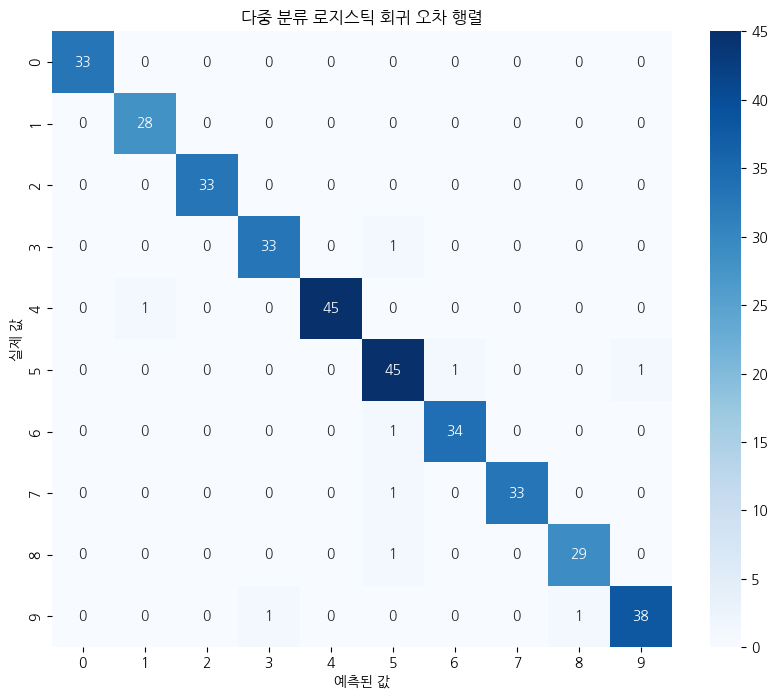

In [1]:
# 파일명: 19_다중_분류_로지스틱_회귀.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.
# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# python3 -m pip install scikit-learn matplotlib numpy seaborn

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("경고: NanumGothic 폰트를 찾을 수 없습니다. 한글을 올바르게 표시하려면 한글 폰트를 설치하세요.")

# -----------------------------------------------------------
# 3. 데이터 준비
# -----------------------------------------------------------
# sklearn에서 제공하는 손글씨 숫자(digits) 데이터셋을 로드합니다.
# 이 데이터셋은 0부터 9까지의 숫자를 다루는 대표적인 다중 분류 문제입니다.
digits = load_digits()

# 특성(X)과 타겟(y) 데이터를 분리합니다.
X = digits.data
y = digits.target

# 데이터의 형태를 확인합니다.
print(f"특성 데이터 형태: {X.shape}")
print(f"타겟 데이터 형태: {y.shape}")

# -----------------------------------------------------------
# 4. 훈련 세트와 테스트 세트 분리
# -----------------------------------------------------------
# 데이터를 훈련 세트와 테스트 세트로 나눕니다. (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# 5. 다중 분류 로지스틱 회귀 모델 훈련
# -----------------------------------------------------------
# LogisticRegression 모델을 생성합니다.
# 다중 분류를 위해 multi_class='multinomial' 옵션을 지정합니다.
# solver='lbfgs'는 다중 분류에 적합한 최적화 알고리즘입니다.
# max_iter는 모델이 수렴할 때까지의 최대 반복 횟수로, 경고를 방지하기 위해 충분히 크게 설정합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, random_state=42)

# 훈련 세트로 모델을 학습시킵니다.
model.fit(X_train, y_train)

# -----------------------------------------------------------
# 6. 모델 평가
# -----------------------------------------------------------
# 테스트 세트를 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도(Accuracy)를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델의 정확도: {accuracy:.4f}")

# 오차 행렬(Confusion Matrix)을 생성합니다.
# 오차 행렬은 예측이 얼마나 잘 맞았는지 시각적으로 보여줍니다.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n오차 행렬:")
print(conf_matrix)

# -----------------------------------------------------------
# 7. 오차 행렬 시각화
# -----------------------------------------------------------
# 오차 행렬을 히트맵(heatmap)으로 시각화하여 결과를 쉽게 파악할 수 있습니다.
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("예측된 값")
plt.ylabel("실제 값")
plt.title("다중 분류 로지스틱 회귀 오차 행렬")
plt.show()

